# **Instructions**

This document is a template, and you are not required to follow it exactly. However, the kinds of questions we ask here are the kinds of questions we want you to focus on. While you might have answered similar questions to these in your project presentations, we want you to go into a lot more detail in this write-up; you can refer to the Lab homeworks for ideas on how to present your data or results. 

You don't have to answer every question in this template, but you should answer roughly this many questions. Your answers to such questions should be paragraph-length, not just a bullet point. You likely still have questions of your own -- that's okay! We want you to convey what you've learned, how you've learned it, and demonstrate that the content from the course has influenced how you've thought about this project.

# Music AI for Audio Recommendation based on Musical Similarity

Project mentor: Sophia Sklaviadis

Bojie Chen <bchen83@jh.edu>, Cokie Parker <cparke57@jh.edu>, Nader Najjar <nnajjar2@jh.edu>, Ruixiang Li <rli52@jh.edu>

Link_to_git_repo: https://github.com/CokieLee/MLFinalProject

# Outline and Deliverables

List the deliverables from your project proposal. For each uncompleted deliverable, please include a sentence or two on why you weren't able to complete it (e.g. "decided to use an existing implementation instead" or "ran out of time"). For each completed deliverable, indicate which section of this notebook covers what you did.

If you spent substantial time on any aspects that weren't deliverables in your proposal, please list those under "Additional Work" and indicate where in the notebook you discuss them.

### Uncompleted Deliverables
1. "Expect to complete #2": evaluate song reccomendation algorithm using metrics given by Spotify Million Playlist Dataset.


### Completed Deliverables
1. "Must complete #1": Create a process to convert songs into features.
2. Generate a prediction for next best song given previous song.


### Additional Deliverables
1. Used logistic regression to classify songs by instrument, using VGG features.
2. Used PCA to reduce dimensionality of song VGG features, and performed clustering of songs by reduced features.

# Preliminaries

## What problem were you trying to solve or understand?

What are the real-world implications of this data and task?
- Music apps such as Spotify and Apple Music research and use music AI algorithms to recommend ‘next song to play’ and generate playlist for users. The data we use are music features we extracted from audio clips based on music theories.

How is this problem similar to others we’ve seen in lectures, breakouts, and homeworks?
- The problem of song recomendation using SNNs is similar in some ways to the problem of facial recognition in an image using CNNs to identify components of a face. This is because SNNs similarly seek to find the structure of local elements, rather than evaluate songs as complete image (spectrogram) inputs.

What makes this problem unique?
- The real world application is open-ended and should regard specific user preference setting.
- There are multiple approaches to the problem solution. Competition such as 'Spotify million playlist challenge' asks researchers to use existing playlist to study features and generate new ones. While we can also use different music theories to generate different features to solve the problem.

What ethical implications does this problem have?
- There are limited ethical considerations in the case of music, the worst being that the recomendation may limit the breadth of musical exposure of the user. However, content recomendation in general (especially outside of music) has the potential to affect the information available to people in manipulative ways (i.e. by increasing addictiveness of content, creating world-view echo chambers, etc).

## Dataset(s)

Describe the dataset(s) you used.
- We used the OpenMIC-2018 dataset (Humphrey, Eric J., Durand, Simon, and McFee, Brian. "OpenMIC-2018: An Open Dataset for Multiple Instrument Recognition." in Proceedings of the 19th International Society for Music Information Retrieval Conference (ISMIR), 2018.)

How were they collected?
- The OpenMIC-2018 dataset was collected via a collaboration between Spotify and an NYU music research laboratory. The purpose is to create an open source dataset without compromising the copywright of Spotify's songs.

Why did you choose them?
- The OpenMIC-2018 data set contains 10 second snippets of audio, and come pre-labeled information from Spotify. Additionally, for each song, the dataset already contains VGGish features as JSON objects, which makes using SNNs on the songs much easier for us.

How many examples in each?
- The OpenMIC-2018 data set contains approximately 20,000 songs.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir("drive/My Drive/ML final project/openmic-2018")

Mounted at /content/drive


In [ ]:
import librosa
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.fft import fftshift

import os

In [ ]:
# Load your data and print 2-3 examples
# here we load three .ogg audio files, and print the raw data, which appears
# as arrays of floats.
filePath0 = '/content/drive/MyDrive/ML final project/openmic-2018/audio/122/122027_30720.ogg'
example0, sampleRate0 = librosa.load(filePath0)
print(example0)

filePath1 = '/content/drive/MyDrive/ML final project/openmic-2018/audio/122/122202_7680.ogg'
example1, sampleRate1 = librosa.load(filePath1)
print(example1)

filePath2 = '/content/drive/MyDrive/ML final project/openmic-2018/audio/122/122003_119040.ogg'
example2, sampleRate2 = librosa.load(filePath2)
print(example2)

[0.         0.         0.         ... 0.13610743 0.01145914 0.15115492]
[ 1.1372991e-06  1.3294258e-06  1.6639834e-06 ... -2.9367495e-01
 -2.4585564e-01 -1.7080620e-01]
[ 1.8701448e-07  3.5725196e-07  3.7663685e-07 ... -1.2999230e-04
 -4.4101286e-03 -9.0655647e-03]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Pre-processing

What features did you use or choose not to use? Why?
- We mostly used VGG features directly from the dataset, which were generated from spectrograms of the songs. This is because they facilitate the use of the neural networks we used. For clustering, we excluded features using PCA dimensionality reduction, which increased our accuracy.
- For song reccomendation, we used whole song snippet spectrograms as input, and let the SNN "choose" features, essentially generating our own VGG features on which we performed deep learning. This occurs in the methods section of the notebook.

If you have categorical labels, were your datasets class-balanced?
- In the case of instrument classification, where label categories fell into 20 different instruments, our dataset was relatively class balanced, with the exception of one class which occured at roughly 4-5x the frequency of the other classes.

How did you deal with missing data? What about outliers?
- We did not encounter significant problems with missing data or outliers.

What approach(es) did you use to pre-process your data? Why?
- For song reccomendation, we had to convert many song snippets in .ogg format to a time-series numpy array, before we could perform fourier transforms on the them to obtain spectrograms.

Are your features continuous or categorical? How do you treat these features differently?
- Our VGG features are continuous, and not human-interpretable. However, both types of features can be represented as vectors of numbers.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Audio #122003_119040')

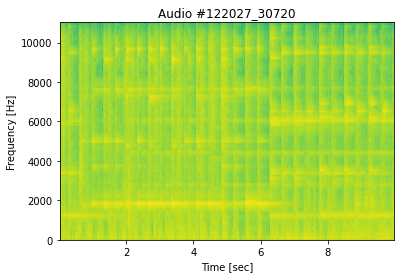

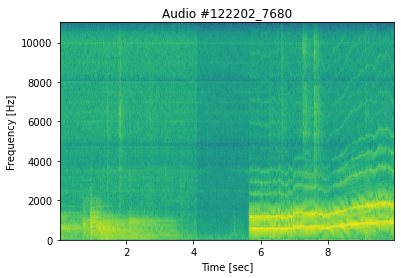

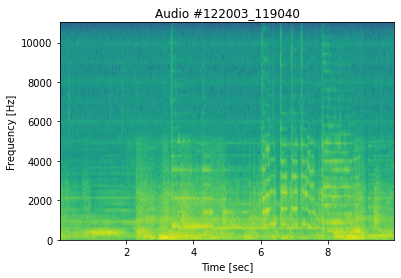

In [ ]:
# For those same examples above, what do they look like after being pre-processed?
# for the preprocessing step, we had to create spectrogram images,
# which will then be loaded into the SNN.
f, t, Sxx0 = signal.spectrogram(example0, fs=sampleRate0)
f, t, Sxx1 = signal.spectrogram(example1, fs=sampleRate1)
f, t, Sxx2 = signal.spectrogram(example2, fs=sampleRate2)

# Convert Sxx unit from dB to Hz
# Sxx is the 2D array of the spectrogram in Hz
Sxx0 = 10*np.log10(Sxx0)
Sxx1 = 10*np.log10(Sxx1)
Sxx2 = 10*np.log10(Sxx2)

# Plot
plt.figure(1)
plt.pcolormesh(t, f, Sxx0, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Audio #122027_30720')

plt.figure(2)
plt.pcolormesh(t, f, Sxx1, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Audio #122202_7680')

plt.figure(3)
plt.pcolormesh(t, f, Sxx2, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Audio #122003_119040')

In [ ]:
# to use the spectrograms, we feed Spectrogram 2D arrays into the SNN network
# Here are the Spectrogram arrays we compare
print('2D Array Audio #122027_30720:')
print(Sxx0)
print('2D Array Audio #122202_7680:')
print(Sxx1)
print('2D Array Audio #122003_119040:')
print(Sxx2)
print('Spectrogram Matrix Input Size:')
Sxx2.shape

2D Array Audio #122027_30720:
[[       -inf -297.2134    -97.47261  ...  -80.5022    -92.77968
   -68.270676]
 [       -inf -310.8628    -95.67666  ...  -60.15421   -57.82624
   -61.54009 ]
 [       -inf -311.9901    -98.42534  ...  -51.677776  -62.802948
   -60.083557]
 ...
 [       -inf -282.23608  -127.79598  ... -117.967155 -115.4786
   -84.90833 ]
 [       -inf -282.09222  -133.58252  ... -118.945465 -114.66457
   -86.5454  ]
 [       -inf -285.05457  -139.94714  ... -137.92863  -121.66828
   -90.18132 ]]
2D Array Audio #122202_7680:
[[ -80.498     -85.70927   -64.6881   ...  -66.53059   -61.827003
   -65.990135]
 [ -67.44203   -56.054005  -58.836445 ...  -82.039154  -69.63222
   -74.71439 ]
 [ -67.89077   -59.231766  -54.282093 ...  -78.93229   -76.04201
   -83.57093 ]
 ...
 [-128.43958  -123.5269   -115.85863  ... -120.06529  -118.57179
  -124.94623 ]
 [-136.49953  -124.00816  -118.718254 ... -125.730705 -124.275085
  -128.15483 ]
 [-147.51909  -127.26638  -165.607    ... -124.1

(129, 984)

In [ ]:
# Visualize the distribution of your data before and after pre-processing.
#   You may borrow from how we visualized data in the Lab homeworks.

# Models and Evaluation

## Experimental Setup

How did you evaluate your methods? Why is that a reasonable evaluation metric for the task?
- For classification of songs by instrument, the dataset came with labels. To evaluate success, we simply ran our algorithm on a test set, and obtained the proportion of cases we correctly labeled.
- For playlist reccomendation, we wrote a method (clustering) to use as a baseline for the method, which for us was more complex and foreign (Siamese Neural Networks (SNNs)).

What did you use for your loss function to train your models? Did you try multiple loss functions? Why or why not?
- For classification by instrument, we used the logistic regression loss function covered in class.
- For playlist generation by SNN, we performed backpropogation on our neural network, using given genre as labels, as shown in class.

How did you split your data into train and test sets? Why?
- We randomly divided our data into a 90-10 train-test split. This is because we only had 20,000 data points, and therefore felt it would be better to maximize training data.


In [ ]:
# Code for loss functions, evaluation metrics or link to Git repo

Github repository: https://github.com/CokieLee/MLFinalProject.

The relevant notebook which performs playlist generation using a Siamese Neural Network is Siamese_Neural_Network.ipynb. The relevant notebook which performs playlist generation using clustering is Clustering.ipynb. The relevant notebook which performs classification by instrument is Instrument Classification.ipynb. Each notebook is it's own self-contained, commented process.

## Baselines 

What baselines did you compare against? Why are these reasonable?
- For song reccomendation for playlists, we had difficulty figuring out how to test accuracy. As a result, we compared two methods for grouping similar songs, clustering vs. SNNs, and compared their performance using our own human judgement.

Did you look at related work to contextualize how others methods or baselines have performed on this dataset/task? If so, how did those methods do?
- Yes, it appears that deep learning that incorporates local structural elements, such as SNNs, are commonly used (for example, in this post: https://towardsdatascience.com/calculating-audio-song-similarity-using-siamese-neural-networks-62730e8f3e3d). This would seem to suggest, perhaps usurprisingly, that the structure of a song, not just its average frequency, for example, affect the listener's experience.

## Methods

More detail for this section is available in the respective specialized python notebooks linked in the github repository.

What methods did you choose? Why did you choose them?
- For the problem of instrument classificiation, we performed logistic multi-class classification using a PCA-reduced set of VGG features. We chose this method because logistic regression is a common method of classification.
- For the problem of playlist generation, we used clustering and Siamese Neural Networks. We chose these methods because they are useful for grouping similar objects.

How did you train these methods, and how did you evaluate them? Why?
- Instrument classification was trained using labels directly from the dataset. We used a 90-10 train test split to evaluate the accuracy percentage.
- Clustering is unsupervised, but for the SNN method, we used genre (pre-assigned by our dataset) of the song as the label for training. We evaluated playlist generation using our own human judgement.

Which methods were easy/difficult to implement and train? Why?
- The SNN was the most difficult to implement because of its multiple components, lack of sk.learn libraries, and new (to us) concepts. Clustering and logistic regression were more straightforward, as they were covered in class, although we perform a multi-class classification and not a binary classification.

For each method, what hyperparameters did you evaluate? How sensitive was your model's performance to different hyperparameter settings?

In [ ]:
# Code for training models, or link to your Git repository

In [ ]:
# Show plots of how these models performed during training.
#  For example, plot train loss and train accuracy (or other evaluation metric) on the y-axis,
#  with number of iterations or number of examples on the x-axis.

Github repository: https://github.com/CokieLee/MLFinalProject.

More detail for this section is available in the respective specialized python notebooks linked in the github repository.

## Results

More details are in the notebooks listed above in Methods.

Show tables comparing your methods to the baselines.

What about these results surprised you? Why?

Did your models over- or under-fit? How can you tell? What did you do to address these issues?
- We believe our instrument classification was overfitting, because our accuracy increased by roughly 10% after we used PCA to reduce the number of VGG features from thousands to 180. This suggests than many features are simply uninformative for our problem, and therefore that our playlist reccomendation using clustering (which used the given VGG features) could have also been overfitting, and so we used the same PCA method to reduce the number of features before performing clustering.

What does the evaluation of your trained models tell you about your data? How do you expect these models might behave differently on different data?
- instrument classification had roughly 60% accuracy. This is substantially better than the 5% accuracy that is expected for randomly assigning songs between 20 labels. This suggests that instruments do have fairly unique signatures in spectrograms, even though spectrograms only measure frequency.
- Based on human evaluation, it also appears that the clustering method of playlist generation was fairly effective at grouping similar songs. In the Clustering notebook, we note an example of this (two songs ranked with high similarity are both jazz songs that sound similar to us).
- Using genre as similarity labels, our SNN for playlist creation had an accuracy of about 60%. We believe this may not be bad, because we only had 10 second sound clips for each song, so there may not be sufficient information to differentiate on, and genre is a limited criteria on which to create playlists of "similar" songs. 60% is still much better than random.

In [ ]:
# Show plots or visualizations of your evaluation metric(s) on the train and test sets.
#   What do these plots show about over- or under-fitting?
#   You may borrow from how we visualized results in the Lab homeworks.
#   Are there aspects of your results that are difficult to visualize? Why?

More detail is available in the relevant notebooks listed under the Experimental Setup section.

# Discussion

## What you've learned

*Note: you don't have to answer all of these, and you can answer other questions if you'd like. We just want you to demonstrate what you've learned from the project.*

What concepts from lecture/breakout were most relevant to your project? How so?
- The most useful portions from class were discussions about overfitting and hyper-parameter selection, neural networks, logistic classification, clustering, and dimensionality reduction.
- We initially used logistic regression for multi-class classification for analyzing the instrumental features.
- We also used clustering and PCA to improve test results.
- Our major achievement is to apply image-analyzing Siamese Neural Network to audio inputs by tranfering them to spectrograms.

What aspects of your project did you find most surprising?
- The number of approaches to the problem based on the feature or group of features we choose. We believe it resembles the open-ended nature of the problem in the real world that, the solution of which is driven by user preferences.
- Similarly, quality metrics evalution can be easily applied to accuracy in classification based on the musical features we chose. But we believe that there's more to evaluate the success of the algorithm beyond simply apply the accuracy since the solution is user preference driven. We learned from the presentation feedback that in the real business, we could collect and analyze the user stickiness to the music recomendation (eg. how many seconds they listen to the song recommended before they skip) to evaluate the successfulness of the recommendation.

What lessons did you take from this project that you want to remember for the next ML project you work on? Do you think those lessons would transfer to other datasets and/or models? Why or why not?
- We learned that sometimes less is more. When we applied PCA dimensionality reduction to our VGG song features, reducing them from thousands to 180, our instrument classification accuracy improved by 10%. We believe this is because we reduced overfitting.

What was the most helpful feedback you received during your presentation? Why?
- We learned from the presentation feedback that in the real business, we could collect and analyze the user stickiness to the music recomendation (eg. how many seconds they listen to the song recommended before they skip) to evaluate the successfulness of the recommendation.

If you had two more weeks to work on this project, what would you do next? Why?
- We would likely attempt to figure out how to evalate the likability of our generated reccomendation playlists using the reactions of real spotify users (other than ourselves). This step is important to refining the hyperparameters of our SNN and improving accuracy for general use.